In [4]:
import nltk
import pandas as pd
import numpy as np
nltk.download('popular')
nltk.download('nps_chat')
nltk.download('webtext')
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.book import *
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
import string
from numpy import array, dot
from numpy.linalg import norm
import scipy
import sklearn
from tensorflow import keras
import tensorflow as tf
from keras.models import Sequential

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

In [5]:
print("NumPy version:", np.__version__)
print("SciPy version:", scipy.__version__)
print("Scikit-learn version:", sklearn.__version__)

NumPy version: 1.26.4
SciPy version: 1.13.1
Scikit-learn version: 1.6.0


In [ ]:
#1

In [26]:
#a
import pandas as pd
df = pd.read_csv('/content/IMDB Dataset.csv')
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [28]:
#b
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['review']).toarray()
y = df['sentiment']

print("Shape of vectorized data:", X.shape)
print("Sample feature names:", vectorizer.get_feature_names_out()[100:105])


Shape of vectorized data: (50000, 5000)
Sample feature names: ['accuracy' 'accurate' 'accurately' 'accused' 'achieve']


In [33]:
#c
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (40000, 5000)
Testing data shape: (10000, 5000)


In [34]:
#d
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_predictions)
nb_accuracy = accuracy_score(y_test, nb_predictions)

print("Logistic Regression Accuracy:", lr_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)


Logistic Regression Accuracy: 0.8697
Naive Bayes Accuracy: 0.8401


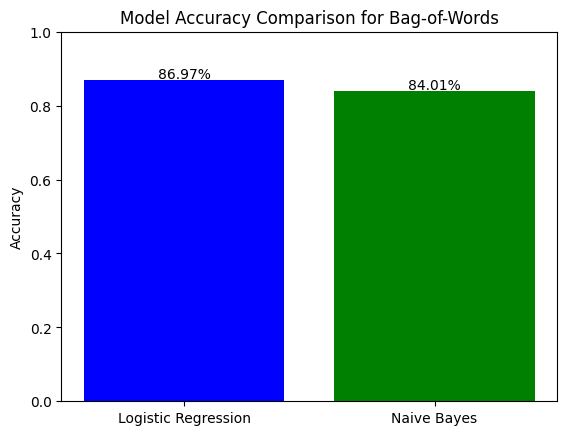

In [38]:
#e
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Naive Bayes']
accuracies = [lr_accuracy, nb_accuracy]

plt.bar(models, accuracies, color=['blue', 'green'])
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.005, f"{acc * 100:.2f}%", ha='center', fontsize=10)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison for Bag-of-Words')
plt.ylim(0.0, 1.0)
plt.show()


In [ ]:
#2

In [42]:
#a
import pandas as pd
df = pd.read_csv('/content/IMDB Dataset.csv')
print(df.head())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [43]:
#b
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['review']).toarray()
y = df['sentiment']

print("Shape of TF-IDF vectorized data:", X_tfidf.shape)
print("Sample feature names:", tfidf_vectorizer.get_feature_names_out()[:10])


Shape of TF-IDF vectorized data: (50000, 5000)
Sample feature names: ['00' '000' '10' '100' '11' '12' '13' '13th' '14' '15']


In [48]:
#c
from sklearn.model_selection import train_test_split

X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=1000)

print("Training data shape (TF-IDF):", X_train_tfidf.shape)
print("Testing data shape (TF-IDF):", X_test_tfidf.shape)


Training data shape (TF-IDF): (40000, 5000)
Testing data shape (TF-IDF): (10000, 5000)


In [45]:
#d
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

lr_tfidf_model = LogisticRegression(max_iter=1000)
lr_tfidf_model.fit(X_train_tfidf, y_train)
lr_tfidf_predictions = lr_tfidf_model.predict(X_test_tfidf)

nb_tfidf_model = MultinomialNB()
nb_tfidf_model.fit(X_train_tfidf, y_train)
nb_tfidf_predictions = nb_tfidf_model.predict(X_test_tfidf)

lr_tfidf_accuracy = accuracy_score(y_test, lr_tfidf_predictions)
nb_tfidf_accuracy = accuracy_score(y_test, nb_tfidf_predictions)

print("Logistic Regression (TF-IDF) Accuracy:", lr_tfidf_accuracy)
print("Naive Bayes (TF-IDF) Accuracy:", nb_tfidf_accuracy)


Logistic Regression (TF-IDF) Accuracy: 0.89
Naive Bayes (TF-IDF) Accuracy: 0.8515


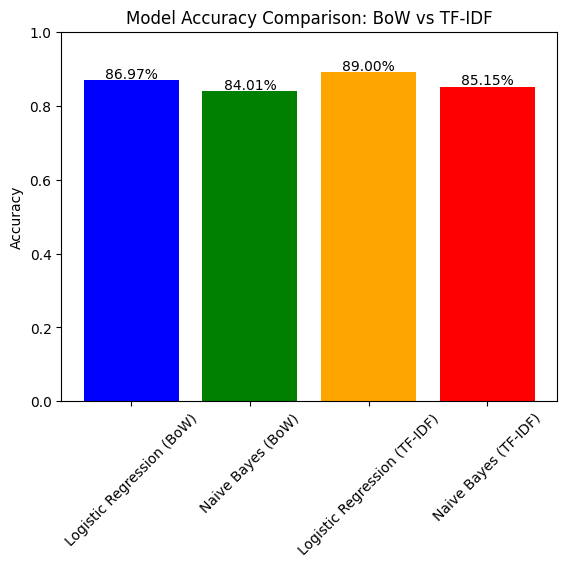

In [77]:
#e
import matplotlib.pyplot as plt

models = ['Logistic Regression (BoW)', 'Naive Bayes (BoW)',
          'Logistic Regression (TF-IDF)', 'Naive Bayes (TF-IDF)']
accuracies = [lr_accuracy, nb_accuracy, lr_tfidf_accuracy, nb_tfidf_accuracy]

plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison: BoW vs TF-IDF')
plt.ylim(0.0, 1.0)

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.005, f"{acc * 100:.2f}%", ha='center', fontsize=10)

plt.xticks(rotation=45)
plt.show()


TF-IDF is generally better for Logistic Regression.
TF-IDF gives more weight to rare but important words while down-weighting common words that occur across all documents.
This helps Logistic Regression learn more meaningful patterns in the data.
Naive Bayes performs similarly for both models.
Naive Bayes works well with BoW because it assumes feature independence. The weighting mechanism of TF-IDF doesn’t always significantly improve Naive Bayes performance.
Logistic Regression performs better with TF-IDF because it leverages the importance of rare terms.
Naive Bayes has similar performance across both methods, but TF-IDF still provides a slight improvement.

In [ ]:
#3

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 200, 100)          2000000   
                                                                 
 lstm_1 (LSTM)               (None, 10)                4440      
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2004561 (7.65 MB)
Trainable params: 4561 (17.82 KB)
Non-trainable params: 2000000 (7.63 MB)
_________________________________________________________________
Epoch 1/50
250/250 [==============================] - 17s 61ms/step - loss: 0.6732 - accuracy: 0.5603 - val_loss: 0.6531 - val_accuracy: 0.6241
Ep

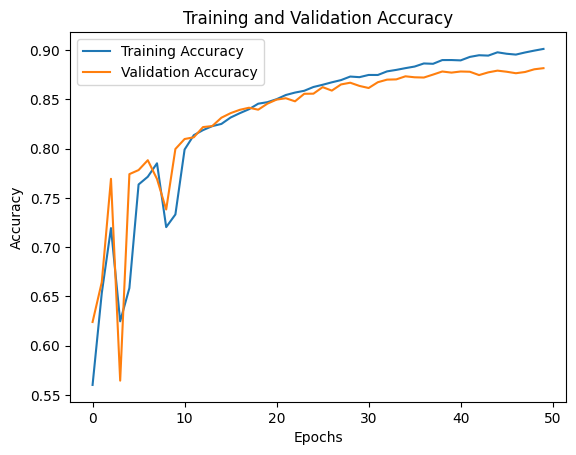

In [76]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM
import matplotlib.pyplot as plt


df = pd.read_csv('/content/IMDB Dataset.csv')
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

max_words = 20000
max_len = 200
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(df['review'])
X = tokenizer.texts_to_sequences(df['review'])
X = pad_sequences(X, maxlen=max_len, padding='post')
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

embedding_dim = 100
embedding_index = {}

with open('/content/glove.6B.100d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vectors = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = vectors


word_index = tokenizer.word_index
num_words = min(max_words, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, embedding_dim))

for word, i in word_index.items():
    if i < num_words:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

model = Sequential([
    Embedding(input_dim=num_words,
              output_dim=embedding_dim,
              weights=[embedding_matrix],
              input_length=max_len,
              trainable=False),
    LSTM(10, return_sequences=False),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy}")

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
